In [18]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Data 8 Tutoring Week 4

Topics to go over: 
    - Joins
        - Implementation
    - Maps
        - Implementation 
    - Iteration
        - Comparison/Booleans
        - Random Selection
        - Control Statements

# The Incumbency Effect
The following table contains data about every congressional representative from the 50 states (DC is not included) from 1995 onward. If an entry contains "nan" it means that there is no entry (i.e. a middlename of "nan" means the congressman or woman had no middle name).

In [19]:
congress = Table().read_table("congress-terms-since1995.csv").drop(2,6,13,14).where("incumbent", are.not_equal_to("nan"))
true_date = make_array()
for i in congress.column("termstart"):
     true_date = np.append(true_date, int(i[:-5:-1][::-1]))
congress = congress.with_column(
    "Term Start", true_date).drop("termstart")
congress

congress,chamber,firstname,middlename,lastname,birthday,state,party,incumbent,age,Term Start
104,house,Sidney,Richard,Yates,8/27/1909,IL,D,Yes,85.4,1995
104,house,James,Henry,Quillen,1/11/1916,TN,R,Yes,79,1995
104,house,Henry,Barbosa,González,5/3/1916,TX,D,Yes,78.7,1995
104,house,Sam,Melville,Gibbons,1/20/1920,FL,D,Yes,75,1995
104,house,George,E.,Brown,3/6/1920,CA,D,Yes,74.8,1995
104,house,Gillespie,V.,Montgomery,8/5/1920,MS,D,Yes,74.4,1995
104,house,Tom,nan,Bevill,3/27/1921,AL,D,Yes,73.8,1995
104,house,Barbara,Farrell,Vucanovich,6/22/1921,NV,R,Yes,73.5,1995
104,house,Carlos,John,Moorhead,5/6/1922,CA,R,Yes,72.7,1995
104,house,Benjamin,nan,Gilman,12/6/1922,NY,R,Yes,72.1,1995


# Question 1.1:
Often times people who've already served in office are said to have an incumbency advantage: an advantage that comes from having prior experience, a well known name, and franking priviledges (they can send mail without paying postage). But just how big is this supposed advantage? Is there an advantage?

In the cell below find out what proportion of representatives have been incumbents since 1995.

In [20]:
prop_incumbents = congress.where("incumbent", are.equal_to("Yes")).num_rows/congress.num_rows
prop_incumbents

0.8566709487979446

# Question 1.2
Of course the House and the Senate differ in many ways, from term lengths, to number of representatives, to jurisdiction of powers. Does one chamber have a higher incidence of incumbent advantage that the other?

In [21]:
# house and senate are tables that only have data about their respective chambers 
house = congress.where("chamber", are.equal_to("house"))
senate = congress.where("chamber", are.equal_to("senate"))

prop_incumbents_house = house.where("incumbent", are.equal_to("Yes")).num_rows/house.num_rows
prop_incumbents_senate = senate.where("incumbent", are.equal_to("Yes")).num_rows/senate.num_rows

print("Proportion of House who have been incumbents:", prop_incumbents_house)
print("Proportion of Senate who have been incumbents:", prop_incumbents_senate)

Proportion of House who have been incumbents: 0.8434389140271493
Proportion of Senate who have been incumbents: 0.9135082604470359


So it would seem that the senate, at least since 1995, has had a more pronounced incumbency effect. I encourage you to think about why this may be

# Parties of Congressional Representatives
Next, we are going to find what proportion of each state's representatives, since 1995, have been Republican or Democrat. Eventually, we're going to use that information to build a map.

First, let's see how the composition of each chamber Congress has changed since 1995.

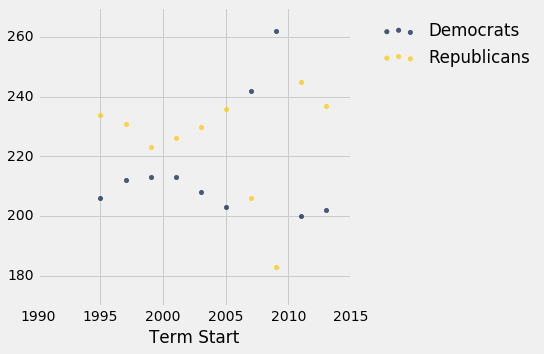

In [22]:
#run cell
house_plot = congress.where("chamber", "house").pivot("party", "Term Start").select("Term Start", "D", "R")\
.relabeled("D", "Democrats").relabeled("R", "Republicans").scatter(0)
house_plot

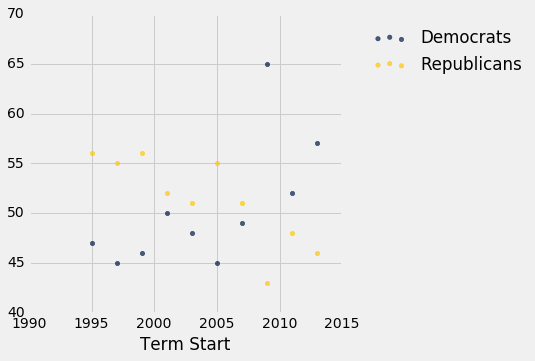

In [23]:
#run cell
senate_plot = congress.where("chamber", "senate").pivot("party", "Term Start").select("Term Start", "D", "R")\
.relabeled("D", "Democrats").relabeled("R", "Republicans").scatter(0)
senate_plot

Obviously, the composition of congress has changed dramatically over the past few years. For the sake of simplicity, we'll only be looking at the overall proportion of democratic versus republican representatives a state has had in the given time.

The following cell creates a table called states that associates each state with the latitude and longitude of one of it's cities (for our purposes it doesn't matter which city it is, so long as the coordinates correspond with a point within each State's borders).

In [24]:
#run cell
abbreviations = Table().read_table("State_names_w_abbreviations.csv")
states_w_cities = Table.read_table("zip_codes_states.csv").where(
    "latitude", are.between_or_equal_to(0.01,360))
states = abbreviations.join("Abbreviation", states_w_cities, "state").drop(2,5,6)
states

Abbreviation,US State,latitude,longitude
AK,Alaska,61.2876,-149.487
AL,Alabama,33.6035,-86.4668
AR,Arkansas,34.209,-91.9859
AZ,Arizona,33.704,-112.352
CA,California,33.974,-118.248
CO,Colorado,39.522,-105.224
CT,Connecticut,41.7579,-72.7283
DE,Delaware,39.5947,-75.6939
FL,Florida,29.9377,-81.4206
GA,Georgia,33.7717,-84.2394


# Question 2.1
Now that we have a table with congressional data and one with coordinates associated with each state, it will be of some use to us to join the 2 tables. 
Use the .join method to create a new table that has a row for every representative and has all of the old congressional data PLUS the new longitude and latitude data. 
(Remember, the order you use .join matters. congress.join(-arguments-) is not the same as states.join(-arguments-)!!)

In [25]:
combined = congress.join("state", states, "Abbreviation")
combined

state,congress,chamber,firstname,middlename,lastname,birthday,party,incumbent,age,Term Start,US State,latitude,longitude
AK,104,house,Don,E.,Young,6/9/1933,R,Yes,61.6,1995,Alaska,61.2876,-149.487
AK,104,senate,Ted,F.,Stevens,11/18/1923,R,Yes,71.1,1995,Alaska,61.2876,-149.487
AK,104,senate,Frank,H.,Murkowski,3/28/1933,R,Yes,61.8,1995,Alaska,61.2876,-149.487
AK,105,house,Don,E.,Young,6/9/1933,R,Yes,63.6,1997,Alaska,61.2876,-149.487
AK,105,senate,Ted,F.,Stevens,11/18/1923,R,Yes,73.1,1997,Alaska,61.2876,-149.487
AK,105,senate,Frank,H.,Murkowski,3/28/1933,R,Yes,63.8,1997,Alaska,61.2876,-149.487
AK,106,house,Don,E.,Young,6/9/1933,R,Yes,65.6,1999,Alaska,61.2876,-149.487
AK,106,senate,Ted,F.,Stevens,11/18/1923,R,Yes,75.1,1999,Alaska,61.2876,-149.487
AK,106,senate,Frank,H.,Murkowski,3/28/1933,R,Yes,65.8,1999,Alaska,61.2876,-149.487
AK,107,house,Don,E.,Young,6/9/1933,R,Yes,67.6,2001,Alaska,61.2876,-149.487


Now our goal is to make 2 maps: One displaying the top 10 most democratic states, and one displaying the top 10 most republican states.

# Question 2.2
In order to build our maps, the first thing we have to do is find out what proportion of representatives from each State are Republican or Democrat. There are several ways to do this, one of which is iteratively. In the cell below is a skeleton to solve the problem iteratively, but if you have another way to do it feel free to employ that in the blank cell 2 cells down.

NOTE: Make sure the that each element of your array corresponds to exactly one state, and that the states each element corresponds to is in alphabetical order
i.e. the first element of prop_democrat_array will be the proportion of democrats in AK.

In [30]:
#make an array that has the proportion of democratic representatives 
#for every state, and one for the proportion of republicans.
prop_democrat_array = make_array()
prop_republican_array = make_array()
for i in states.column("Abbreviation"): 
    prop_democrat_one_state = combined.where("state", i).where(
        "party", "D").num_rows/combined.where("state", i).num_rows
    prop_republican_one_state = combined.where("state", i).where(
        "party", "R").num_rows/combined.where("state", i).num_rows       
    prop_democrat_array = np.append(prop_democrat_array, prop_democrat_one_state)
    prop_republican_array = np.append(prop_republican_array, prop_republican_one_state)

In [27]:
#Your own way
prop_democrat_array = 

SyntaxError: invalid syntax (<ipython-input-27-971baf574fef>, line 2)

# Question 2.3
now make a table called proportions_and_locations that has your new arrays appended onto it as columns. It should have 1 row for every state, and the following columns: latitude, longitude, State Abbreviation, Proportion Republican,and Proportion Democrat. They should be in that order as well.

In [31]:
proportions_and_locations = states.drop("Abbreviation").with_columns(
    "State Abbreviation", states.column("Abbreviation"),
    "Proportion Republican", prop_republican_array,
    "Proportion Democrat", prop_democrat_array).drop(0)
proportions_and_locations 

latitude,longitude,State Abbreviation,Proportion Republican,Proportion Democrat
61.2876,-149.487,AK,0.903226,0.0967742
33.6035,-86.4668,AL,0.769231,0.230769
34.209,-91.9859,AR,0.393443,0.606557
33.704,-112.352,AZ,0.723404,0.276596
33.974,-118.248,CA,0.372093,0.627907
39.522,-105.224,CO,0.574713,0.425287
41.7579,-72.7283,CT,0.22973,0.72973
39.5947,-75.6939,DE,0.34375,0.65625
29.9377,-81.4206,FL,0.644195,0.35206
33.7717,-84.2394,GA,0.643836,0.356164


Now, we're almost ready to make our maps! First, make 2 tables: one called top_10_republican and one called top_10_democrat. Each should be the same as proportions_and_locations, except each should only have 10 rows for each of the states with the highest proportion of republican and democratic representatives, respectively. They should also only have the proportions for their own party (top_10_republicans shouldn't have a "Proportion Democrat" column and visa versa)

In [32]:
top_10_republican = proportions_and_locations.sort(3, descending = True).take(np.arange(10)).drop(4)
top_10_republican

latitude,longitude,State Abbreviation,Proportion Republican
41.2517,-104.563,WY,1
42.7702,-112.26,ID,0.975
35.2032,-98.3574,OK,0.906667
61.2876,-149.487,AK,0.903226
39.5359,-95.2251,KS,0.888889
40.3207,-110.436,UT,0.843137
41.332,-96.9494,NE,0.8
38.2745,-85.0904,KY,0.792683
42.8747,-71.6294,NH,0.775
33.6035,-86.4668,AL,0.769231


In [33]:
top_10_democrat = proportions_and_locations.sort(4, descending = True).take(np.arange(10)).drop(3)
top_10_democrat

latitude,longitude,State Abbreviation,Proportion Democrat
21.3907,-157.928,HI,0.97619
42.1405,-72.7887,MA,0.968254
46.4479,-96.7278,ND,0.866667
41.5301,-71.2841,RI,0.829268
37.3327,-81.1601,WV,0.826923
38.6038,-76.8679,MD,0.745098
45.2633,-121.089,OR,0.739726
41.7579,-72.7283,CT,0.72973
40.9223,-72.6371,NY,0.697531
39.5947,-75.6939,DE,0.65625


The following cell takes each table you made and puts them in a suitable format to be read by the .map_table function. 

In [34]:
#run cell 
map_ready_top_10_democrat = top_10_democrat.drop(3).with_columns(
    "Color", np.array(["blue"] * 10),
    "Size", (top_10_democrat.column(3)**5)*(10**12))
map_ready_top_10_republican = top_10_republican.drop(3).with_columns(
    "Color", np.array(["red"] * 10),
    "Size", (top_10_republican.column(3)**5)*(10**12))

In [35]:
map_ready_top_10_democrat

latitude,longitude,State Abbreviation,Color,Size
21.3907,-157.928,HI,blue,8.86488e+11
42.1405,-72.7887,MA,blue,8.51033e+11
46.4479,-96.7278,ND,blue,4.88946e+11
41.5301,-71.2841,RI,blue,3.92171e+11
37.3327,-81.1601,WV,blue,3.86657e+11
38.6038,-76.8679,MD,blue,2.2965e+11
45.2633,-121.089,OR,blue,2.2149e+11
41.7579,-72.7283,CT,blue,2.06924e+11
40.9223,-72.6371,NY,blue,1.65127e+11
39.5947,-75.6939,DE,blue,1.21716e+11


In [36]:
map_ready_top_10_republican

latitude,longitude,State Abbreviation,Color,Size
41.2517,-104.563,WY,red,1e+12
42.7702,-112.26,ID,red,8.81096e+11
35.2032,-98.3574,OK,red,6.12686e+11
61.2876,-149.487,AK,red,6.01148e+11
39.5359,-95.2251,KS,red,5.54929e+11
40.3207,-110.436,UT,red,4.2608e+11
41.332,-96.9494,NE,red,3.2768e+11
38.2745,-85.0904,KY,red,3.12966e+11
42.8747,-71.6294,NH,red,2.79582e+11
33.6035,-86.4668,AL,red,2.69329e+11


Now, use .map_table to create 2 maps: One for the each of the above tables. Both should use circles whose size is proportionate to the proportion of republican or democrat representatives.

In [37]:
democrat_map = Circle.map_table(map_ready_top_10_democrat)
democrat_map

In [38]:
republican_map = Circle.map_table(map_ready_top_10_republican)
republican_map

# Making Comparisons

In [39]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


1.1 Find the number of actors whose number of movies are greater than 50 by using the table method ".where".

In [40]:
actors.where("Number of Movies", are.above(50)).num_rows

7

1.2 Find the number of actors whose number of movies are greater than 50 without using the table method ".where".

In [41]:
np.count_nonzero(actors.column("Number of Movies") > 50)

7

1.3 Count the number of actors who have played in "The Dark Knight" in the table above.

In [42]:
np.count_nonzero(actors.column("#1 Movie") == "The Dark Knight")

3

# Conditional Statement Review

Chained Conditional Statement

if x < y:

    STATEMENTS_A
    
elif x > y:

    STATEMENTS_B
    
else:

    STATEMENTS_C

Nested Conditional Statement

if x < y:

    STATEMENTS_A
    
else:

    if x > y:
    
        STATEMENTS_B
        
    else:
    
        STATEMENTS_C

2.1 Write a function that take in a string username and a string password and verify if the username and password match with the provided information.

In [43]:
myusername = "aliceinwonderland"
mypassword = "ilovenutella"

def verify(username, password):
    #if the username is not correct, print out an error message "No user found"
    
    #if the username is correct but the password is not, 
    #print out an error message "The password entered is not correct"
    
    #if both the username and password are correct, print out "Welcome back!"
    
    if username != myusername:
        print("No user found")
    else:
        if password != mypassword:
            print("The password entered is not correct")
        else:
            print("Welcome back!")

In [44]:
# run verify(myusername, mypassword) to see if you implement the function correctly
verify(myusername, mypassword)

Welcome back!


# Iteration

3.1 Write a function that takes in a list of numbers and prints out all the negative numbers from the list.

In [45]:
def printnegative(mylist):
    for i in np.arange(len(mylist)):
        if mylist.item(i) < 0:
            print(mylist.item(i))

In [46]:
#verify if the function above behaves correctly
mylist = make_array(1,-1,4,0,-7,-12,3,-3)
printnegative(mylist)

-1
-7
-12
-3
